In [13]:
import numpy as np
import pandas as pd
from sklearn import *
from itertools import product
from textblob import TextBlob
from multiprocess import Pool
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns
import random
from nltk.tokenize import ToktokTokenizer
from itertools import chain
from collections import Counter

In [3]:
LABELS = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']
COMMENT = 'comment_text'

In [4]:
train = pd.read_csv('jigsaw-toxic-comment-classification-challenge/train.csv')
test = pd.read_csv('jigsaw-toxic-comment-classification-challenge/test.csv')
test_labels = pd.read_csv('jigsaw-toxic-comment-classification-challenge/test_labels.csv')
sample_submission = pd.read_csv('jigsaw-toxic-comment-classification-challenge/sample_submission.csv')

# Problem understanding

# Dataset generation

# Metrics define

# Validation strategy

# Data processing (extract useful information)

# Data understanding & visualization

/home/shanger_lin/.pyenv/versions/3.6.4/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


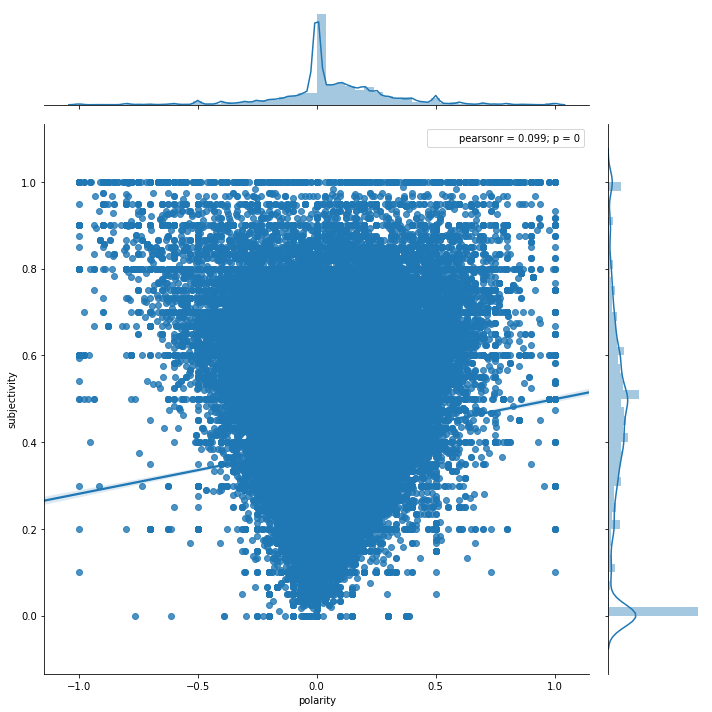

In [5]:
SENTIMENT = ['polarity', 'subjectivity']
with Pool() as pool:
    train['polarity'] = pool.map(lambda text: TextBlob(text).polarity, train[COMMENT])
    train['subjectivity'] = pool.map(lambda text: TextBlob(text).subjectivity, train[COMMENT])
sns.jointplot(x="polarity", y="subjectivity", data=train, size=10, kind='reg');

toxic polarity


/home/shanger_lin/.pyenv/versions/3.6.4/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


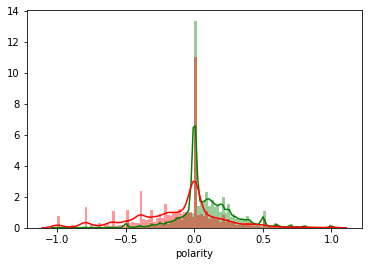

severe_toxic polarity


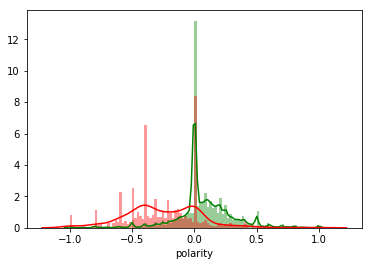

obscene polarity


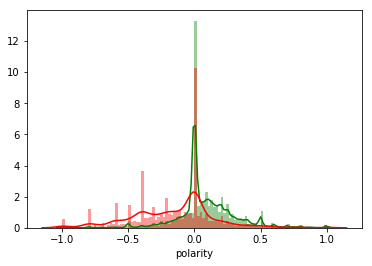

threat polarity


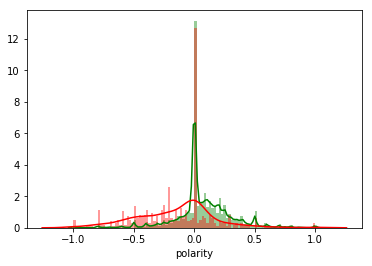

insult polarity


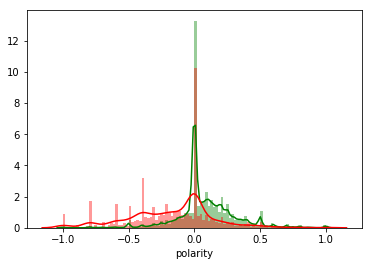

identity_hate polarity


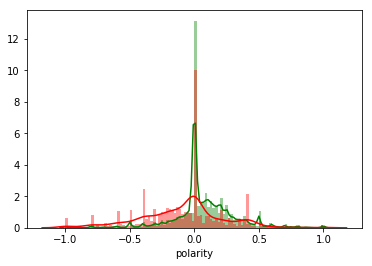

toxic subjectivity


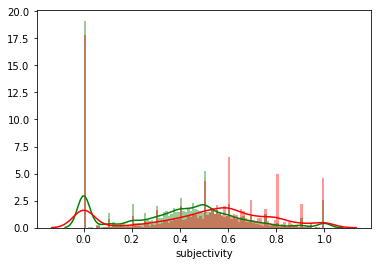

severe_toxic subjectivity


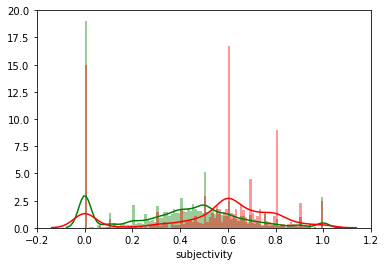

obscene subjectivity


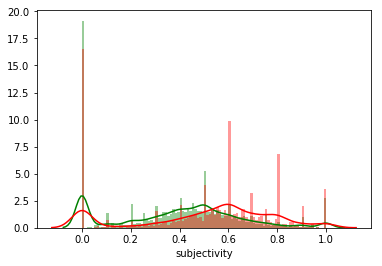

threat subjectivity


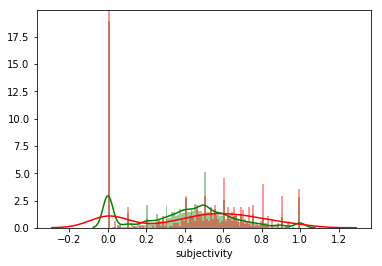

insult subjectivity


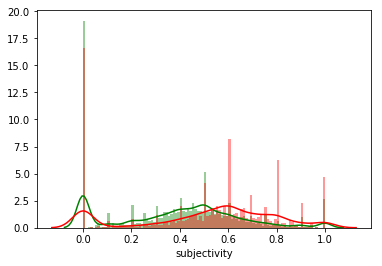

identity_hate subjectivity


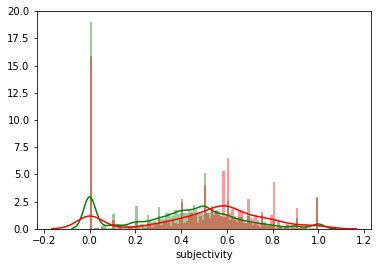

<Figure size 432x288 with 0 Axes>

In [7]:
for sentiment, toxic_type  in product(SENTIMENT, LABELS):
    print(toxic_type, sentiment)
    sns.distplot(train[train[toxic_type]==0][sentiment], color="g", bins=100, label='negative')
    sns.distplot(train[train[toxic_type]==1][sentiment], color="r", bins=100, label='positive')
    plt.show()
    plt.clf()  

### NOTE
    ### Bias fits intuition.
    ### Both 'polarity', 'subjectivity' would be good features.
    ### Needs to deal with 0 values.
    ### Futher: get sentiment by sentence?

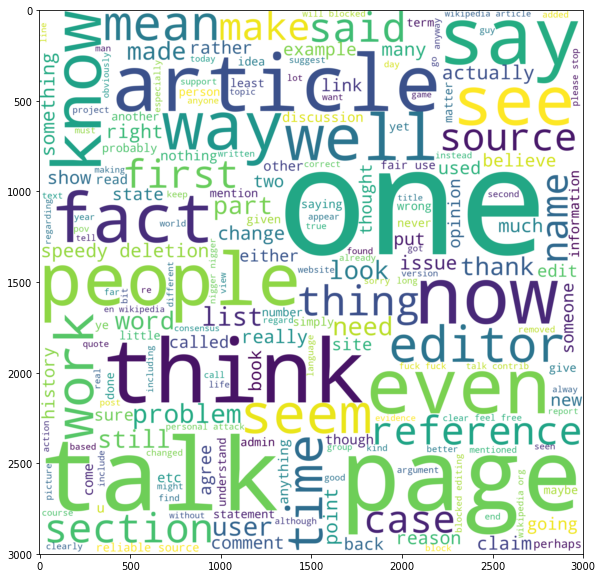

In [9]:
text = ' '.join(train[COMMENT]).lower()
wordcloud = WordCloud(background_color="white",width=3000, height=3000, margin=1).generate(text)
plt.figure(figsize=(10,10)) 
plt.imshow(wordcloud, interpolation='bilinear')

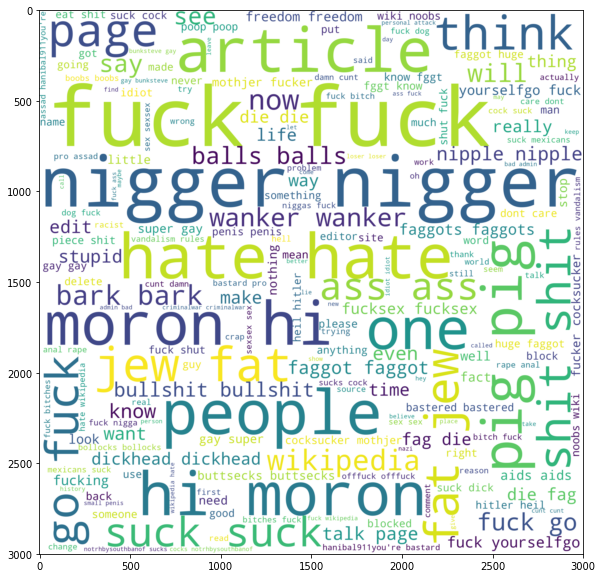

In [10]:
text = ' '.join(train[train['toxic']==1][COMMENT]).lower()
wordcloud = WordCloud(background_color="white",width=3000, height=3000, margin=1).generate(text)
plt.figure(figsize=(10,10)) 
plt.imshow(wordcloud, interpolation='bilinear')

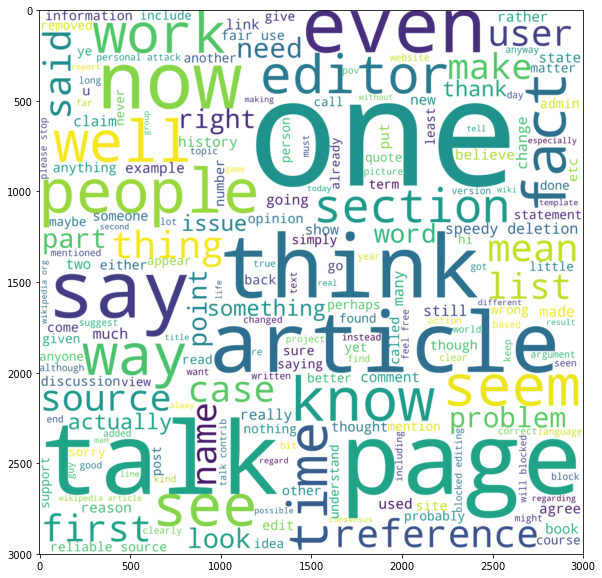

In [11]:
text = ' '.join(train[train['toxic']==0][COMMENT]).lower()
wordcloud = WordCloud(background_color="white",width=3000, height=3000, margin=1).generate(text)
plt.figure(figsize=(10,10)) 
plt.imshow(wordcloud, interpolation='bilinear')

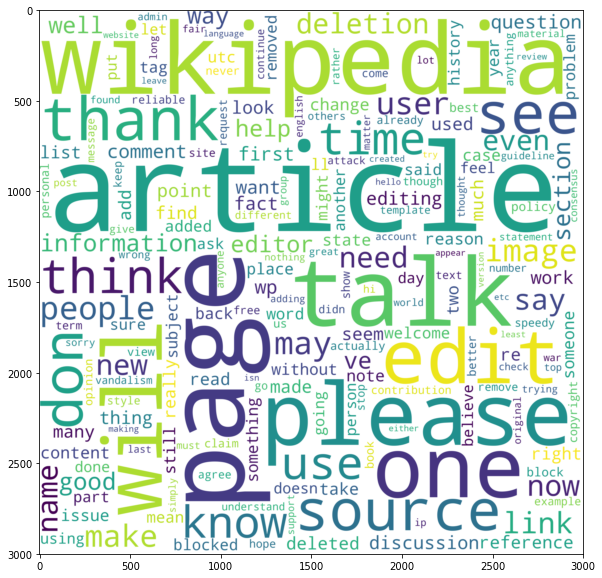

In [14]:
tokenizer = ToktokTokenizer()
p_token_lines = tokenizer.tokenize_sents(train[train['toxic']==1][COMMENT].apply(lambda x: x.lower()))
p_tokens = list(chain.from_iterable(p_token_lines))
p_tokens = Counter(p_tokens)

n_token_lines = tokenizer.tokenize_sents(train[train['toxic']==0][COMMENT].apply(lambda x: x.lower()))
n_tokens = list(chain.from_iterable(n_token_lines))
n_tokens = Counter(n_tokens)

n_bias_tokens = {k: v - p_tokens.get(k, 0) for k, v in n_tokens.items() if (v - p_tokens.get(k, 0)) > 0}

n_bias_tokens_list = list()
for k, v in n_bias_tokens.items():
    n_bias_tokens_list.append([k]*v) 
n_bias_tokens_list = list(chain.from_iterable(n_bias_tokens_list))
random.shuffle(n_bias_tokens_list)
n_bias_tokens = ' '.join(n_bias_tokens_list)
text = n_bias_tokens
wordcloud = WordCloud(background_color="white",width=3000, height=3000, margin=10).generate(text)
plt.figure(figsize=(10,10)) 
plt.imshow(wordcloud, interpolation='bilinear')

In [18]:
p_bias_tokens = {k: (v - n_tokens.get(k, 0)) for k, v in p_tokens.items() if (v - n_tokens.get(k, 0)) > 0}
for i, (k, v) in enumerate(p_bias_tokens.items()):
    if v==1 and i < 100:
        print(k)

-contribution
sityush
antisemmitian
greetingshhh
tatoo
satanistic
fuckeeed
down???/
=tony
fistfuckee.
fuckcock
mcdickerson.
sorrows
ejaculating
discplines.
skills/abilities
encylopia
wimp
oife
conndoms
j*sus.
permanat
raeasc
jessus
blrude
tw@
boy.u
smelly.fuck
people.you
lost.you
earth.bloody
fool.check
crawled
arses.
startle
24.77.205.229
gardez


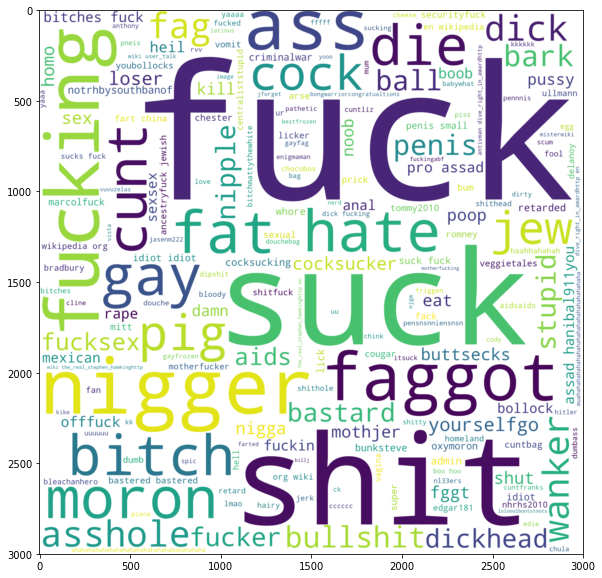

In [19]:
p_bias_tokens = {k: (v - n_tokens.get(k, 0)) for k, v in p_tokens.items() if (v - n_tokens.get(k, 0)) > 0}

p_bias_tokens_list = list()
for k, v in p_bias_tokens.items():
    p_bias_tokens_list.append([k]*v) 
p_bias_tokens_list = list(chain.from_iterable(p_bias_tokens_list))
random.shuffle(p_bias_tokens_list)
p_bias_tokens = ' '.join(p_bias_tokens_list)
text = p_bias_tokens
wordcloud = WordCloud(background_color="white",width=3000, height=3000, margin=10).generate(text)
plt.figure(figsize=(10,10)) 
plt.imshow(wordcloud, interpolation='bilinear')

# De-noise (no drop data)

# Feature engineering

# Offline augmentation

# Standarization

# Scaling

# Normalization

# Feature selection

# Data selection

# Optimization

# Parameter tuning

# Online augmentation

# Model selection / blending

# Post-processing

# Evaluation

# Reasoning

# Monitoring